# <font color=blue> __Single-cell RNA-seq data analysis using SCANPY__  </font>

- 이 주피터 노트북은 단일세포 RNA-seq 데이터를 분석하기 위한 기초 실습을 포함합니다.
- SCANPY를 이용한 전처리, 시각화를 위한 기본적인 처리 과정에 대한 코드 예제를 제공합니다.
- Google Colab에서 실습하는 것을 가정하고 만들었으나 Anaconda 등이 설치된 개인 컴퓨터에서도 사용할 수 있습니다.
<br>

- __AnnData Format:__ https://anndata.readthedocs.io/en/stable/
- __SCANPY:__ https://scanpy.readthedocs.io/en/stable/
<br>

__MLBI-lab, July 21, 2025__

## __1. Install required packages and import them__
이제 파일이 준비되었으니 필요한 패키지를 설치하고 이를 불러와서(import해서) 데이터를 들여다 볼 수 있습니다.

In [ ]:
## 필요한 패키지 설치 (이미 설치되었다면 skip 해도 됩니다.)
'''
!pip install gdown
!pip install numpy
!pip install pandas
!pip install scipy
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn
!pip install scikit-network
'''
!pip install leidenalg
!pip install scanpy
!pip install scoda-viz==0.4.10
## This jupyter notebook was tested with the above version of scoda-viz package.

In [2]:
## 필요한 패키지 불러오기
import copy, warnings, os
import anndata
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from scodaviz import load_sample_data, plot_sankey

warnings.filterwarnings('ignore')

https://github.com/combio-dku
INFO: statannotations was sucessfully installed.


## __2A. Download a sample data__

In [76]:
adata = load_sample_data( 'BC' )
adata

Downloading...
From (original): https://drive.google.com/uc?export=download&id=158LUiHiJNFzYvqY-QzMUm5cvIznBrUAV
From (redirected): https://drive.google.com/uc?export=download&id=158LUiHiJNFzYvqY-QzMUm5cvIznBrUAV&confirm=t&uuid=8998f75f-00c1-4852-93d1-603980603c6a
To: /content/downloaded
100%|██████████| 124M/124M [00:00<00:00, 145MB/s]


File saved to: BC.h5ad


AnnData object with n_obs × n_vars = 33742 × 22585
    obs: 'Patient', 'Description', 'Source', 'Condition', 'Menopause', 'Parity', 'Gender', 'geo_no', 'subtype', 'subtype_detail', 'tissue', 'condition', 'sample'
    uns: 'log'

## __2A. Or, Load your h5ad file__

In [5]:
file_h5ad = 'BC.h5ad'

In [ ]:
adata = sc.read_h5ad(file_h5ad)
adata

## __3. Check your data__

#### __AnnData Format:__ https://anndata.readthedocs.io/en/stable/
  
<div>
<img src="https://drive.google.com/uc?export=view&id=1IGjZpO_DeaNFiX3u_fy_rnPC1oKwVsqU" align="center" width="500"/>
</div>
<div>
<img src="attachment:fefeae20-ad05-4cea-8327-72f3dd19903f.png" width="500"/>
</div>


In [8]:
adata

AnnData object with n_obs × n_vars = 33742 × 22585
    obs: 'Patient', 'Description', 'Source', 'Condition', 'Menopause', 'Parity', 'Gender', 'geo_no', 'subtype', 'subtype_detail', 'condition', 'sample'

In [ ]:
adata.obs.head()

In [ ]:
adata.var.head()

In [ ]:
adata.obs[['condition']].value_counts()

In [ ]:
adata.obs[['sample']].value_counts()

In [15]:
lst = [adata.obs['condition'], adata.obs['sample']]
plot_sankey(lst, title=None, fs=12, WH=(400, 600), th=30, title_y=0.85 )

## __4. Filtering cells and genes__
#### __Get statistics for Cell/Gene filtering__

In [16]:
adata

AnnData object with n_obs × n_vars = 33742 × 22585
    obs: 'Patient', 'Description', 'Source', 'Condition', 'Menopause', 'Parity', 'Gender', 'geo_no', 'subtype', 'subtype_detail', 'condition', 'sample'
    var: 'my_col'

In [17]:
## select genes of which the name start with 'MT-', i.e., mitochondrial genes
adata.var['mt'] = adata.var_names.str.startswith('MT-')
## Boolean values saved to the new column named, 'mt' in var

In [18]:
## Check the number of mitochondrial genes
display(adata.var['mt'].sum())

np.int64(13)

In [19]:
adata

AnnData object with n_obs × n_vars = 33742 × 22585
    obs: 'Patient', 'Description', 'Source', 'Condition', 'Menopause', 'Parity', 'Gender', 'geo_no', 'subtype', 'subtype_detail', 'condition', 'sample'
    var: 'my_col', 'mt'

In [20]:
## Get stats
sc.pp.calculate_qc_metrics(adata, qc_vars = ['mt'], percent_top = None, \
                           log1p = False, inplace = True)

adata
## Results of this function are stored in new columns in the obs field

AnnData object with n_obs × n_vars = 33742 × 22585
    obs: 'Patient', 'Description', 'Source', 'Condition', 'Menopause', 'Parity', 'Gender', 'geo_no', 'subtype', 'subtype_detail', 'condition', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'my_col', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

pp.calculate_qc_metrics: https://scanpy.readthedocs.io/en/stable/generated/scanpy.pp.calculate_qc_metrics.html

In [21]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [22]:
adata.obs[['n_genes_by_counts', 'total_counts', 'pct_counts_mt']].min()

n_genes_by_counts    201.0
total_counts         499.0
pct_counts_mt          0.0
dtype: float64

#### __Cell/Gene filtering__
- cell-by-gene count matrix에서 각 gene이 발현된 cell 수가 너무 적은 것은 제거
- 이를 위해 cell-by-gene count matrix를 data frame으로 가져와서
- 각 gene에 대해 0보다 큰 cell의 수를 계산하여
- 이 수를 기준으로 조건을 만들어서 filtering 함

#### Easy way to cell/gene filtering

In [23]:
sc.pp.filter_cells(adata, min_genes = 200)
sc.pp.filter_cells(adata, max_genes = 4000)
sc.pp.filter_genes(adata, min_cells = 20)

adata

AnnData object with n_obs × n_vars = 31676 × 20013
    obs: 'Patient', 'Description', 'Source', 'Condition', 'Menopause', 'Parity', 'Gender', 'geo_no', 'subtype', 'subtype_detail', 'condition', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'my_col', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [24]:
adata.write('BC_filtered.h5ad')

In [25]:
b = adata.obs['pct_counts_mt'] <= 15
adata = adata[b, :]
adata

View of AnnData object with n_obs × n_vars = 29912 × 20013
    obs: 'Patient', 'Description', 'Source', 'Condition', 'Menopause', 'Parity', 'Gender', 'geo_no', 'subtype', 'subtype_detail', 'condition', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'my_col', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

## __5. Basic processings (Clustering & Visualization)__

#### __2차원 시각화(UMAP 또는 tSNE)를 위한 몇 가지 routine 한 step__
1. Count normalization: 각 행의 합(각 cell에 대한 RNA count의 총합)을 동일한 값(예 10,000)으로 맞춤
2. 1-augmented log-transform: Raw count의 확률분포를 정규분포에 가깝게 변환 (log변환 전 1을 더함)
3. highly variable gene selection: cell마다 값들의 변동이 큰 gene들을 확인하여 var field의 열('variable_gene')에 저장
4. Dimension reduction using PCA: 선형변환 방식인 PCA를 이용하여 각 cell의 expression pattern(X의 각 행)을 차원 축소 -> obsm['X_pca']에 저장됨. (_Note:_ PCA를 위한 차원은 소위 'explained variance' plot을 보고 결정하면 좋지만 대략 15정도로 설정해도 무방함.)
5. Building Neighbor graph: PCA로 차원 축소한 벡터를 이용하여, 각 cell에 대해 expression pattern이 유사한 k개의 cell을 선택하여 이를 sparse matrix 형태로 저장 (matrix 크기는 cell수xcell수 이며 obsp field에 sparse matrix로 저장 됨.
6. UMAP or tSNE projection: Neighbor graph까지 얻어졌으면 umap 또는 tsne를 이용하여 2차원으로 차원 축소하여 산점도 확인 가능
7. Clustering: 비슷한 expression pattern을 갖는 cell들을 하나의 클러스터로 그룹핑

In [26]:
## 1. Count normalization
sc.pp.normalize_total(adata, target_sum=1e4)
adata

AnnData object with n_obs × n_vars = 29912 × 20013
    obs: 'Patient', 'Description', 'Source', 'Condition', 'Menopause', 'Parity', 'Gender', 'geo_no', 'subtype', 'subtype_detail', 'condition', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'my_col', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [27]:
## 2. 1-augmented log-transform
sc.pp.log1p(adata)
adata

AnnData object with n_obs × n_vars = 29912 × 20013
    obs: 'Patient', 'Description', 'Source', 'Condition', 'Menopause', 'Parity', 'Gender', 'geo_no', 'subtype', 'subtype_detail', 'condition', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'my_col', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'log1p'

In [28]:
adata.uns['log1p']

{'base': None}

In [29]:
## 3. highly variable gene selection
sc.pp.highly_variable_genes(adata, n_top_genes = 2000)
adata

AnnData object with n_obs × n_vars = 29912 × 20013
    obs: 'Patient', 'Description', 'Source', 'Condition', 'Menopause', 'Parity', 'Gender', 'geo_no', 'subtype', 'subtype_detail', 'condition', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'my_col', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [30]:
adata.var['highly_variable'].sum()

np.int64(2000)

In [31]:
## check stats of highly-variable genes
sc.pl.highly_variable_genes(adata)

In [32]:
## 4. Dimension reduction using PCA
sc.tl.pca(adata, n_comps = 15, use_highly_variable = True)
adata

AnnData object with n_obs × n_vars = 29912 × 20013
    obs: 'Patient', 'Description', 'Source', 'Condition', 'Menopause', 'Parity', 'Gender', 'geo_no', 'subtype', 'subtype_detail', 'condition', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'my_col', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [33]:
adata.uns['pca']

{'params': {'zero_center': True,
  'use_highly_variable': True,
  'mask_var': 'highly_variable'},
 'variance': array([24.075504 , 18.033474 , 14.110218 ,  8.895969 ,  6.6927214,
         5.6220827,  5.2768087,  4.1957088,  3.8235846,  3.5552516,
         3.179636 ,  2.9621868,  2.7823598,  2.2875917,  2.1568778],
       dtype=float32),
 'variance_ratio': array([0.08321258, 0.0623294 , 0.04876938, 0.03074729, 0.02313217,
        0.0194317 , 0.01823832, 0.0145017 , 0.01321552, 0.01228808,
        0.01098983, 0.01023826, 0.00961672, 0.00790664, 0.00745485],
       dtype=float32)}

In [34]:
adata.obsm['X_pca'].shape

(29912, 15)

In [35]:
## 5. Building Neighbor graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=15, use_rep = 'X_pca')
adata

AnnData object with n_obs × n_vars = 29912 × 20013
    obs: 'Patient', 'Description', 'Source', 'Condition', 'Menopause', 'Parity', 'Gender', 'geo_no', 'subtype', 'subtype_detail', 'condition', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'my_col', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [36]:
adata.obsp['connectivities']

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 396816 stored elements and shape (29912, 29912)>

In [37]:
## 6a: Compute UMAP projection
sc.tl.umap(adata)
adata

AnnData object with n_obs × n_vars = 29912 × 20013
    obs: 'Patient', 'Description', 'Source', 'Condition', 'Menopause', 'Parity', 'Gender', 'geo_no', 'subtype', 'subtype_detail', 'condition', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'my_col', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [38]:
## 6b: tSNE projection (It takes time)
sc.tl.tsne(adata)
adata

AnnData object with n_obs × n_vars = 29912 × 20013
    obs: 'Patient', 'Description', 'Source', 'Condition', 'Menopause', 'Parity', 'Gender', 'geo_no', 'subtype', 'subtype_detail', 'condition', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'my_col', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'tsne'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [39]:
adata.obsm['X_umap']

array([[ 0.10846342, -2.5636137 ],
       [ 2.3675623 ,  6.8748436 ],
       [ 2.9709337 ,  7.471164  ],
       ...,
       [ 8.321751  ,  4.094105  ],
       [ 8.251015  ,  5.310342  ],
       [ 8.843413  ,  5.323864  ]], dtype=float32)

In [40]:
## 7: Clustering using leiden algorithm
sc.tl.leiden(adata, resolution = 1, key_added = 'cluster')
## The clustering resolution was intentionally set low for quick example. Default value is 1.
adata

AnnData object with n_obs × n_vars = 29912 × 20013
    obs: 'Patient', 'Description', 'Source', 'Condition', 'Menopause', 'Parity', 'Gender', 'geo_no', 'subtype', 'subtype_detail', 'condition', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'cluster'
    var: 'my_col', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'tsne', 'cluster'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [41]:
adata.obs['cluster'].value_counts()

cluster
0     2207
1     2049
2     2026
3     1569
4     1447
5     1353
6     1340
7     1234
8     1140
9     1076
10     996
11     965
12     925
13     893
14     879
15     866
16     861
17     861
18     849
19     784
20     776
21     750
22     747
23     542
24     518
25     486
26     447
27     433
28     402
29     276
30     215
Name: count, dtype: int64

## __6. Visualization__

#### 이제 UMAP 또는 tSNE 좌표를 이용해 대체적인 분포를 시각화해 볼 수 있습니다.

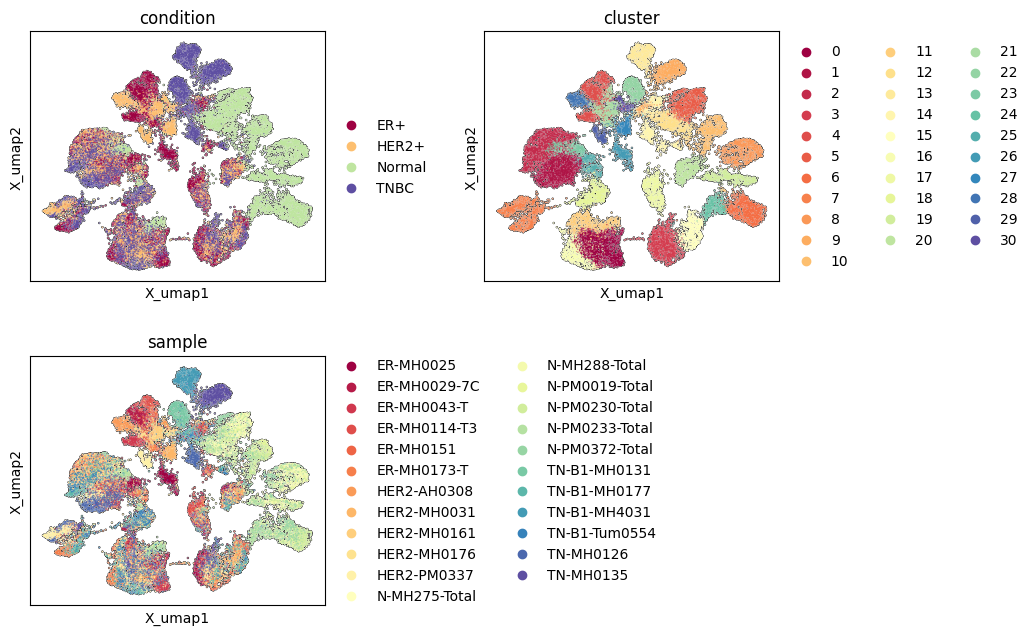

In [42]:
items_to_plot = ['condition', 'cluster', 'sample']

plt.rcParams['figure.figsize'] = (3.5, 3.5)
sc.pl.embedding( adata, color = items_to_plot,
                 basis = 'X_umap', neighbors_key = 'neighbors',
                 wspace = 0.4, hspace = 0.3, legend_fontsize = 10,
                 ncols = 2, palette = 'Spectral', add_outline = True)

In [43]:
items_to_plot = ['condition', 'cluster', 'sample']

plt.rcParams['figure.figsize'] = (3.5, 3.5)
sc.pl.embedding( adata, color = items_to_plot,
                 basis = 'X_tsne', neighbors_key = 'neighbors',
                 wspace = 0.4, hspace = 0.3, legend_fontsize = 10,
                 ncols = 2, palette = 'Spectral', add_outline = True)

#### 잘 알려진 몇가지 marker gene들의 발현량을 보면 어느 cluster가 무슨 세포유형인지 대략적으로 확인 가능

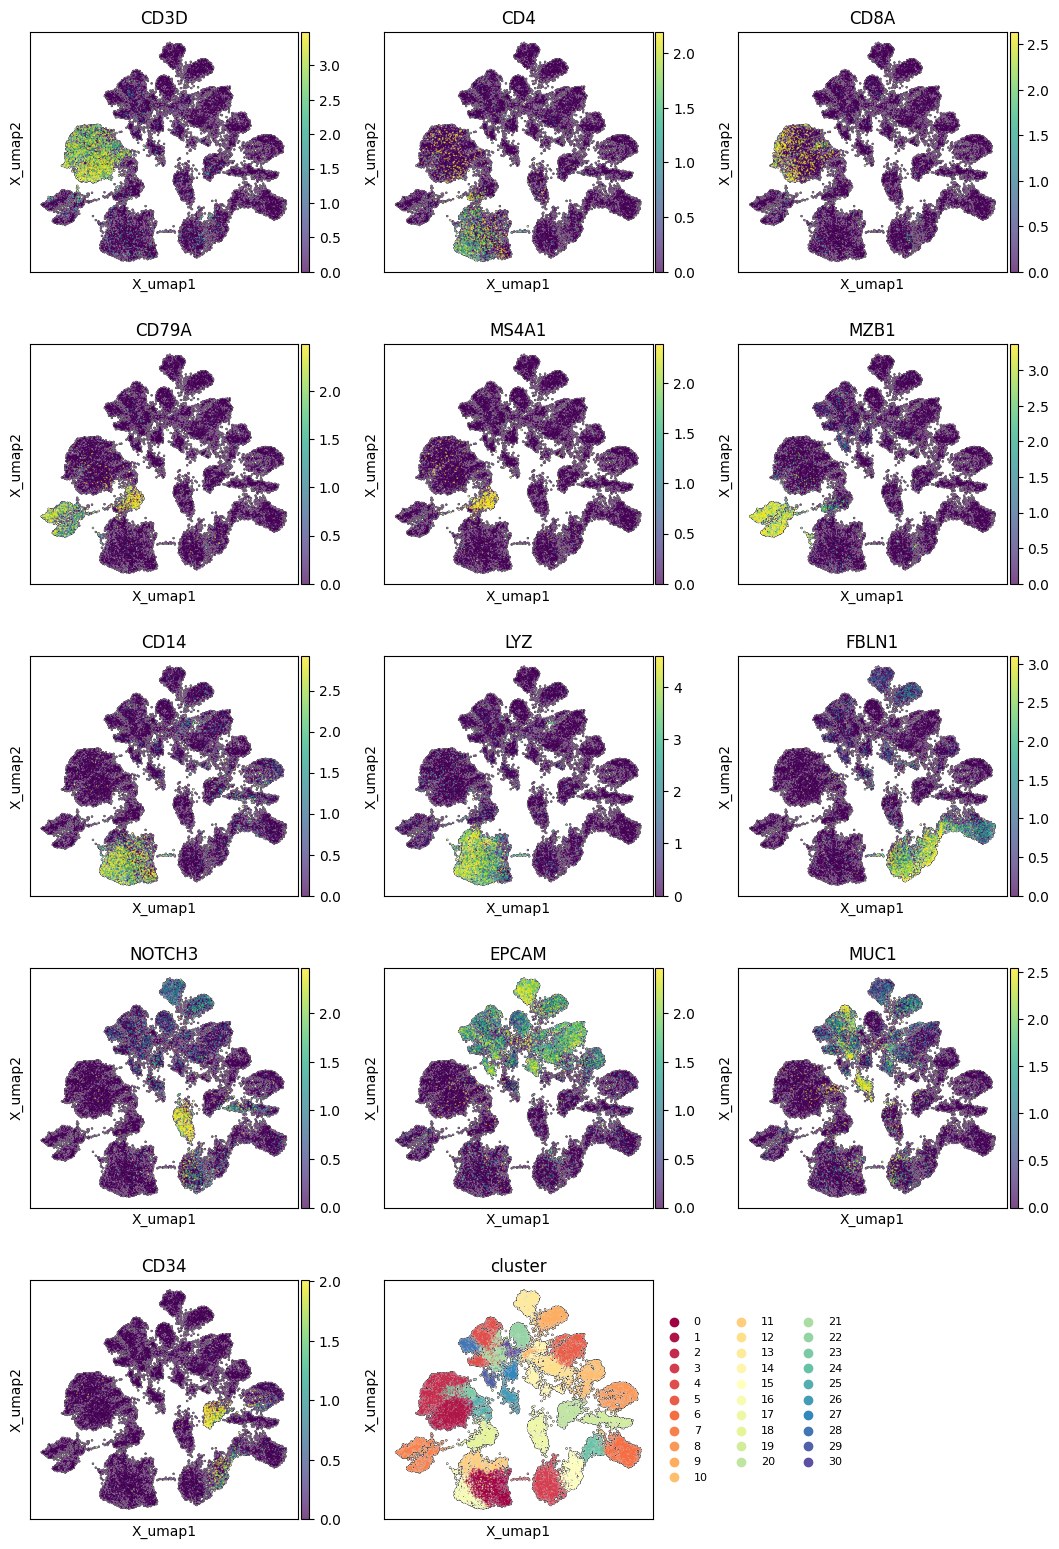

In [52]:
genes_to_plot = ['CD3D', 'CD4', 'CD8A',     ## T cell markers
                 'CD79A', 'MS4A1', 'MZB1',  ## B cell markers
                 'CD14', 'LYZ',             ## Myeloid cell markers
                 'FBLN1', 'NOTCH3',         ## Stromal cells (Fibroblast, Smooth muscle cell) markers
                 'EPCAM', 'MUC1',           ## Epithelial cell markers
                 'CD34']                    ## Endothelial cell marker

plt.rcParams['figure.figsize'] = (3.5, 3.5)
sc.pl.embedding( adata, color = genes_to_plot + ['cluster'], use_raw = False,
                 basis = 'X_umap', neighbors_key = 'neighbors',
                 wspace = 0.2, hspace = 0.3, legend_fontsize = 8,
                 ncols = 3, palette = 'Spectral', add_outline = True, vmax = 'p99', vmin = 0)

#### Cluster 별 manual cell-type annotation을 할 때 요런 plot을 먼저 봅니다.

In [53]:
genes_to_plot_dct = { 'T': ['CD3D', 'CD4', 'CD8A'],     ## T cell markers
                      'B': ['CD79A', 'MS4A1', 'MZB1'],  ## B cell markers
                      'M': ['CD14', 'LYZ'],             ## Myeloid cell markers
                      'S': ['FBLN1', 'NOTCH3'],         ## Stromal cells (Fibroblast, Smooth muscle cell) markers
                      'Epi': ['EPCAM', 'MUC1'],         ## Epithelial cell markers
                      'Endo': ['CD34'] }                ## Endothelial cell marker

In [60]:
sc.pl.stacked_violin(adata, genes_to_plot_dct, groupby='cluster', figsize = (6,6))

In [55]:
adata.obs['my_celltype_annot'] = 'NA'
b = adata.obs['cluster'].isin( ['0', '11', '16'] )
adata.obs.loc[b, 'my_celltype_annot'] = 'M'

b = adata.obs['cluster'].isin( ['1', '2', '23', '25'] )
adata.obs.loc[b, 'my_celltype_annot'] = 'T'

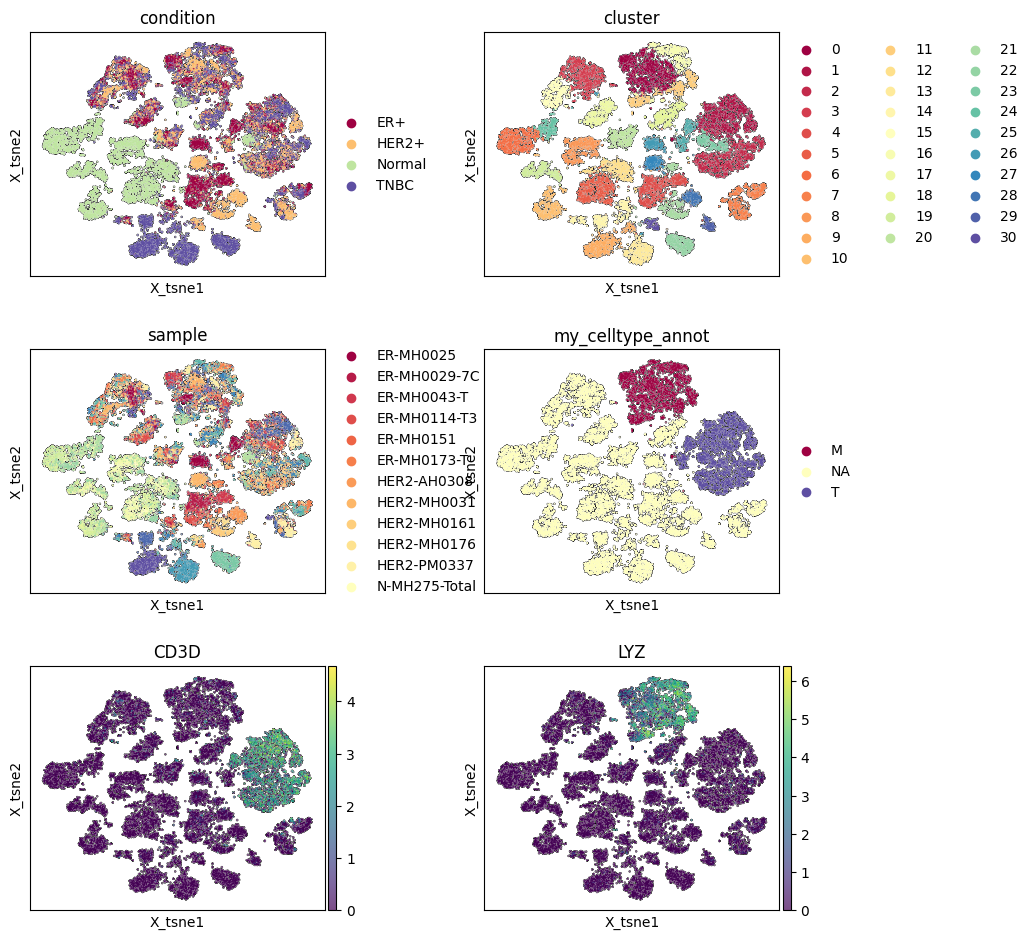

In [56]:
plt.rcParams['figure.figsize'] = (3.5, 3.5)
sc.pl.embedding( adata, color = items_to_plot,
                 basis = 'X_tsne', neighbors_key = 'neighbors',
                 wspace = 0.4, hspace = 0.3, legend_fontsize = 10,
                 ncols = 2, palette = 'Spectral', add_outline = True)

In [61]:
sc.pl.dotplot(adata, genes_to_plot_dct, groupby='cluster', figsize = (6,6))

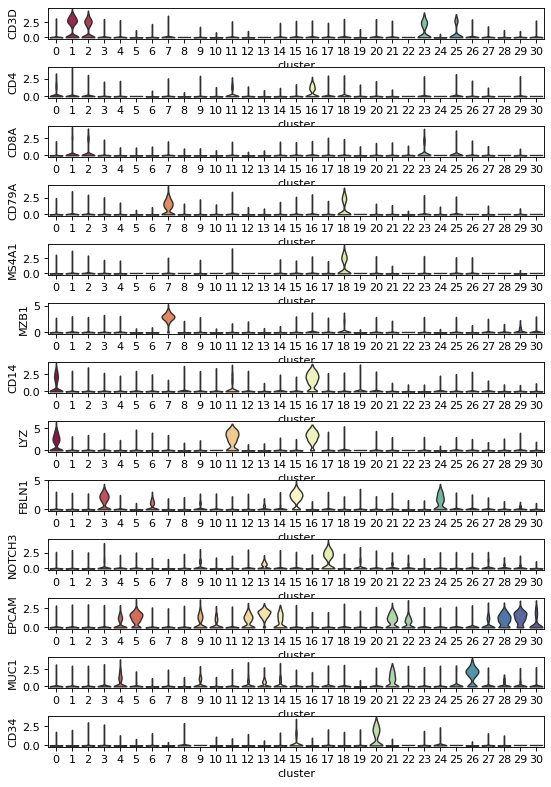

In [73]:
fig, axes = plt.subplots(len(genes_to_plot), 1, figsize=(8, 2*len(items_to_plot)), dpi = 80)
plt.subplots_adjust(hspace = 0.9)

for j, item in enumerate(genes_to_plot):
    sc.pl.violin(adata, [item], groupby='cluster', ax = axes[j], use_raw = False, stripplot = False, show = False)

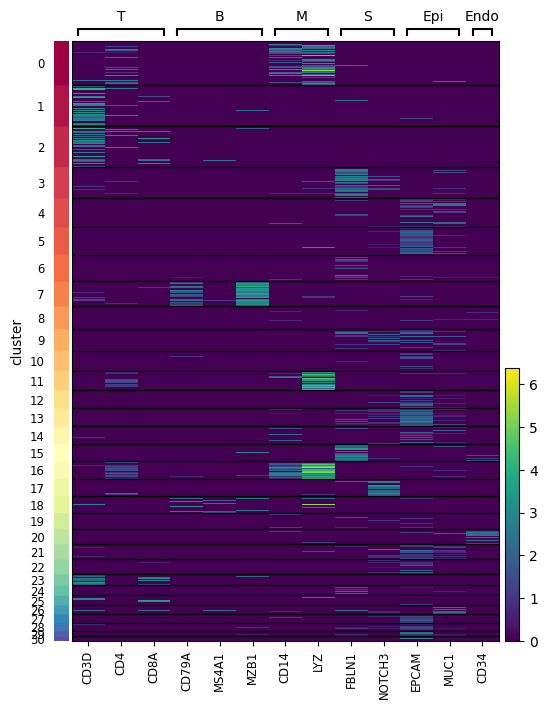

In [63]:
genes_to_plot_dct = {'T': ['CD3D', 'CD4', 'CD8A'],     ## T cell markers
                 'B': ['CD79A', 'MS4A1', 'MZB1'],  ## B cell markers
                 'M': ['CD14', 'LYZ'],             ## Myeloid cell markers
                 'S': ['FBLN1', 'NOTCH3'],         ## Stromal cells (Fibroblast, Smooth muscle cell) markers
                 'Epi': ['EPCAM', 'MUC1'],           ## Epithelial cell markers
                 'Endo': ['CD34'] }                   ## Endothelial cell marker


sc.pl.heatmap( adata, var_names = genes_to_plot_dct, groupby = 'cluster',
               var_group_labels = genes_to_plot_dct.keys(),
               standard_scale = True, figsize = (6, 8) )

## __7. DEG Analysis (among clusters)__

In [64]:
adata

AnnData object with n_obs × n_vars = 29912 × 20013
    obs: 'Patient', 'Description', 'Source', 'Condition', 'Menopause', 'Parity', 'Gender', 'geo_no', 'subtype', 'subtype_detail', 'condition', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'cluster', 'my_celltype_annot'
    var: 'my_col', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'tsne', 'cluster', 'condition_colors', 'cluster_colors', 'sample_colors', 'my_celltype_annot_colors'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [67]:
test_sel = 't-test'  ## 'logreg', 't-test', 'wilcoxon', 't-test_overestim_var'
sc.tl.rank_genes_groups(adata, groupby = 'cluster', method=test_sel,
                        key_added = test_sel, pts = True)
adata

AnnData object with n_obs × n_vars = 29912 × 20013
    obs: 'Patient', 'Description', 'Source', 'Condition', 'Menopause', 'Parity', 'Gender', 'geo_no', 'subtype', 'subtype_detail', 'condition', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'cluster', 'my_celltype_annot'
    var: 'my_col', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'tsne', 'cluster', 'condition_colors', 'cluster_colors', 'sample_colors', 'my_celltype_annot_colors', 'wilcoxon', 't-test'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [68]:
adata.uns['t-test'].keys()

dict_keys(['params', 'pts', 'pts_rest', 'names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges'])

#### Get DEG results in data frame

In [69]:
target_cluster = '1'
gene_rank = sc.get.rank_genes_groups_df(adata, group = target_cluster,
                                        key = test_sel, pval_cutoff = 0.01,
                                        log2fc_min = 0.25)
gene_rank.iloc[:30]

names      scores  logfoldchanges          pvals      pvals_adj  \
0     TMSB4X  140.004166        2.943186   0.000000e+00   0.000000e+00   
1        B2M  137.839676        2.553258   0.000000e+00   0.000000e+00   
2       CD52   56.807156        4.346461   0.000000e+00   0.000000e+00   
3       IL32   51.510223        3.856651   0.000000e+00   0.000000e+00   
4      HLA-B   50.544495        2.001733   0.000000e+00   0.000000e+00   
5       CD3D   48.465900        4.708109   0.000000e+00   0.000000e+00   
6     S100A4   48.275635        2.922502   0.000000e+00   0.000000e+00   
7      HLA-A   47.034809        2.046615   0.000000e+00   0.000000e+00   
8       TRAC   45.292423        4.716219  7.247024e-313  5.332158e-311   
9     CORO1A   42.363258        3.791234  1.235986e-284  7.681919e-283   
10       CD2   38.750668        4.121243  1.999241e-248  9.664445e-247   
11      CCL5   36.323090        3.993760  7.331215e-225  2.982106e-223   
12    MALAT1   35.029858        0.835262  6.005819e-226  2.488498e-224   
13  SH3BGRL3   35.023170        1.980927  5.458787e-215  2.026840e-213   
14      RGS1   33.374153        2.861048  1.452079e-197  4.875914e-196   
15     RPS27   32.909454        0.823584  4.374019e-197  1.466285e-195   
16      CD69   32.900440        3.447039  3.262755e-192  1.036469e-190   
17      SRGN   32.889366        2.300272  3.540814e-194  1.152233e-192   
18     CXCR4   32.810230        2.625929  2.081132e-192  6.632117e-191   
19     TRBC2   32.575901        3.871358  9.633000e-189  2.993559e-187   
20     TRBC1   32.515591        4.332261  6.120156e-188  1.887252e-186   
21      BTG1   32.498180        1.821568  1.522418e-190  4.783070e-189   
22       LTB   32.315067        3.777855  2.403781e-186  7.311073e-185   
23      HCST   31.030544        2.977104  8.565771e-175  2.354763e-173   
24      ACTB   30.486536        1.230903  5.200409e-173  1.410241e-171   
25   ARHGDIB   28.616724        2.277956  5.141595e-153  1.192338e-151   
26       CD7   28.588100        3.944845  5.662933e-152  1.301174e-150   
27      RAC2   27.728678        3.234235  1.715339e-144  3.735482e-143   
28     HLA-C   26.696274        1.339991  4.476969e-137  8.995741e-136   
29      PFN1   25.501453        1.378501  3.465601e-126  6.363034e-125   

    pct_nz_group  pct_nz_reference  
0       1.000000          0.944263  
1       0.999512          0.958152  
2       0.725720          0.150738  
3       0.710102          0.253849  
4       0.930698          0.798263  
5       0.610542          0.073646  
6       0.790142          0.444712  
7       0.903367          0.769730  
8       0.573450          0.069878  
9       0.578331          0.144134  
10      0.507077          0.068693  
11      0.497804          0.103471  
12      1.000000          0.987151  
13      0.763787          0.622618  
14      0.565154          0.222553  
15      0.992191          0.984926  
16      0.466569          0.102071  
17      0.644705          0.328823  
18      0.571986          0.259843  
19      0.422157          0.061049  
20      0.406052          0.047195  
21      0.788189          0.689804  
22      0.435822          0.082690  
23      0.461201          0.137386  
24      0.940459          0.921258  
25      0.506589          0.274199  
26      0.348463          0.044001  
27      0.364080          0.086064  
28      0.817472          0.757241  
29      0.777940          0.744608

In [70]:
gene_rank.shape

(830, 7)

In [71]:
target_cluster = '18'
gene_rank = sc.get.rank_genes_groups_df(adata, group = target_cluster,
                                        key = test_sel, pval_cutoff = 0.01,
                                        log2fc_min = 0.25)
gene_rank.iloc[:30]

names     scores  logfoldchanges          pvals      pvals_adj  \
0    HLA-DRA  71.445724        4.420445   0.000000e+00   0.000000e+00   
1       CD74  71.429802        4.004875   0.000000e+00   0.000000e+00   
2      RPS27  40.358974        1.315174  3.622308e-207  3.588775e-205   
3   HLA-DRB1  36.894848        3.274543  5.686255e-182  4.410815e-180   
4        B2M  35.099056        1.162971  6.563231e-182  5.051921e-180   
5      CXCR4  34.709877        3.395492  4.554148e-167  3.048233e-165   
6   HLA-DPB1  34.140381        3.212856  6.311207e-164  4.100850e-162   
7       CD37  32.479866        4.076266  1.028344e-151  5.732662e-150   
8   HLA-DPA1  31.736032        3.066238  1.969977e-148  1.065545e-146   
9       IGKC  30.104530        3.300464  2.337258e-138  1.105805e-136   
10  HLA-DQB1  28.955711        3.230362  9.380165e-130  3.935540e-128   
11  HLA-DQA1  27.997091        3.236037  1.298649e-123  5.066248e-122   
12    MT-CO2  26.580875        1.087875  5.172729e-117  1.858561e-115   
13     RPL28  25.298054        0.996276  8.078104e-108  2.549954e-106   
14     MS4A1  25.106001        7.822217  1.840235e-104  5.529824e-103   
15     RPL34  25.047255        0.957186  3.063987e-106  9.462898e-105   
16     RPS29  24.041704        1.179184   2.743391e-99   7.678808e-98   
17     RPL11  24.034407        0.882806   1.091696e-99   3.077199e-98   
18      CD52  23.855688        2.861309   2.806286e-97   7.569030e-96   
19     RPS12  23.257866        0.966622   1.809976e-94   4.638033e-93   
20     RPL39  22.862885        0.958910   8.372077e-92   2.048293e-90   
21       LTB  22.829664        3.403710   1.234541e-90   2.966010e-89   
22     RPS28  22.590500        0.911175   4.463416e-90   1.063409e-88   
23    LAPTM5  22.270430        2.546244   2.165292e-87   4.874465e-86   
24      BTG1  21.908422        1.754155   1.897112e-85   4.149388e-84   
25     RPL37  21.791615        1.030200   4.461651e-85   9.726690e-84   
26    MALAT1  21.771118        0.860128   9.440968e-86   2.071733e-84   
27     CD79A  21.547462        4.712785   1.547865e-82   3.240316e-81   
28     RPS23  21.231499        0.988970   1.314029e-81   2.708307e-80   
29       FAU  21.214918        0.942637   1.777511e-81   3.648547e-80   

    pct_nz_group  pct_nz_reference  
0       0.952886          0.320992  
1       0.970554          0.443244  
2       0.996466          0.985101  
3       0.808009          0.288374  
4       0.996466          0.959949  
5       0.770318          0.266937  
6       0.775029          0.249561  
7       0.667845          0.120634  
8       0.746761          0.241131  
9       0.747939          0.249183  
10      0.670200          0.183636  
11      0.639576          0.144789  
12      0.996466          0.968895  
13      0.982332          0.956474  
14      0.455830          0.005505  
15      0.985866          0.968964  
16      0.971731          0.937033  
17      0.983510          0.958848  
18      0.601885          0.178096  
19      0.982332          0.969102  
20      0.981154          0.970650  
21      0.513545          0.095001  
22      0.979976          0.966315  
23      0.585395          0.189485  
24      0.831567          0.692599  
25      0.963486          0.932664  
26      0.995289          0.987820  
27      0.406360          0.037298  
28      0.964664          0.942367  
29      0.961131          0.928397

#### Show the DEG results

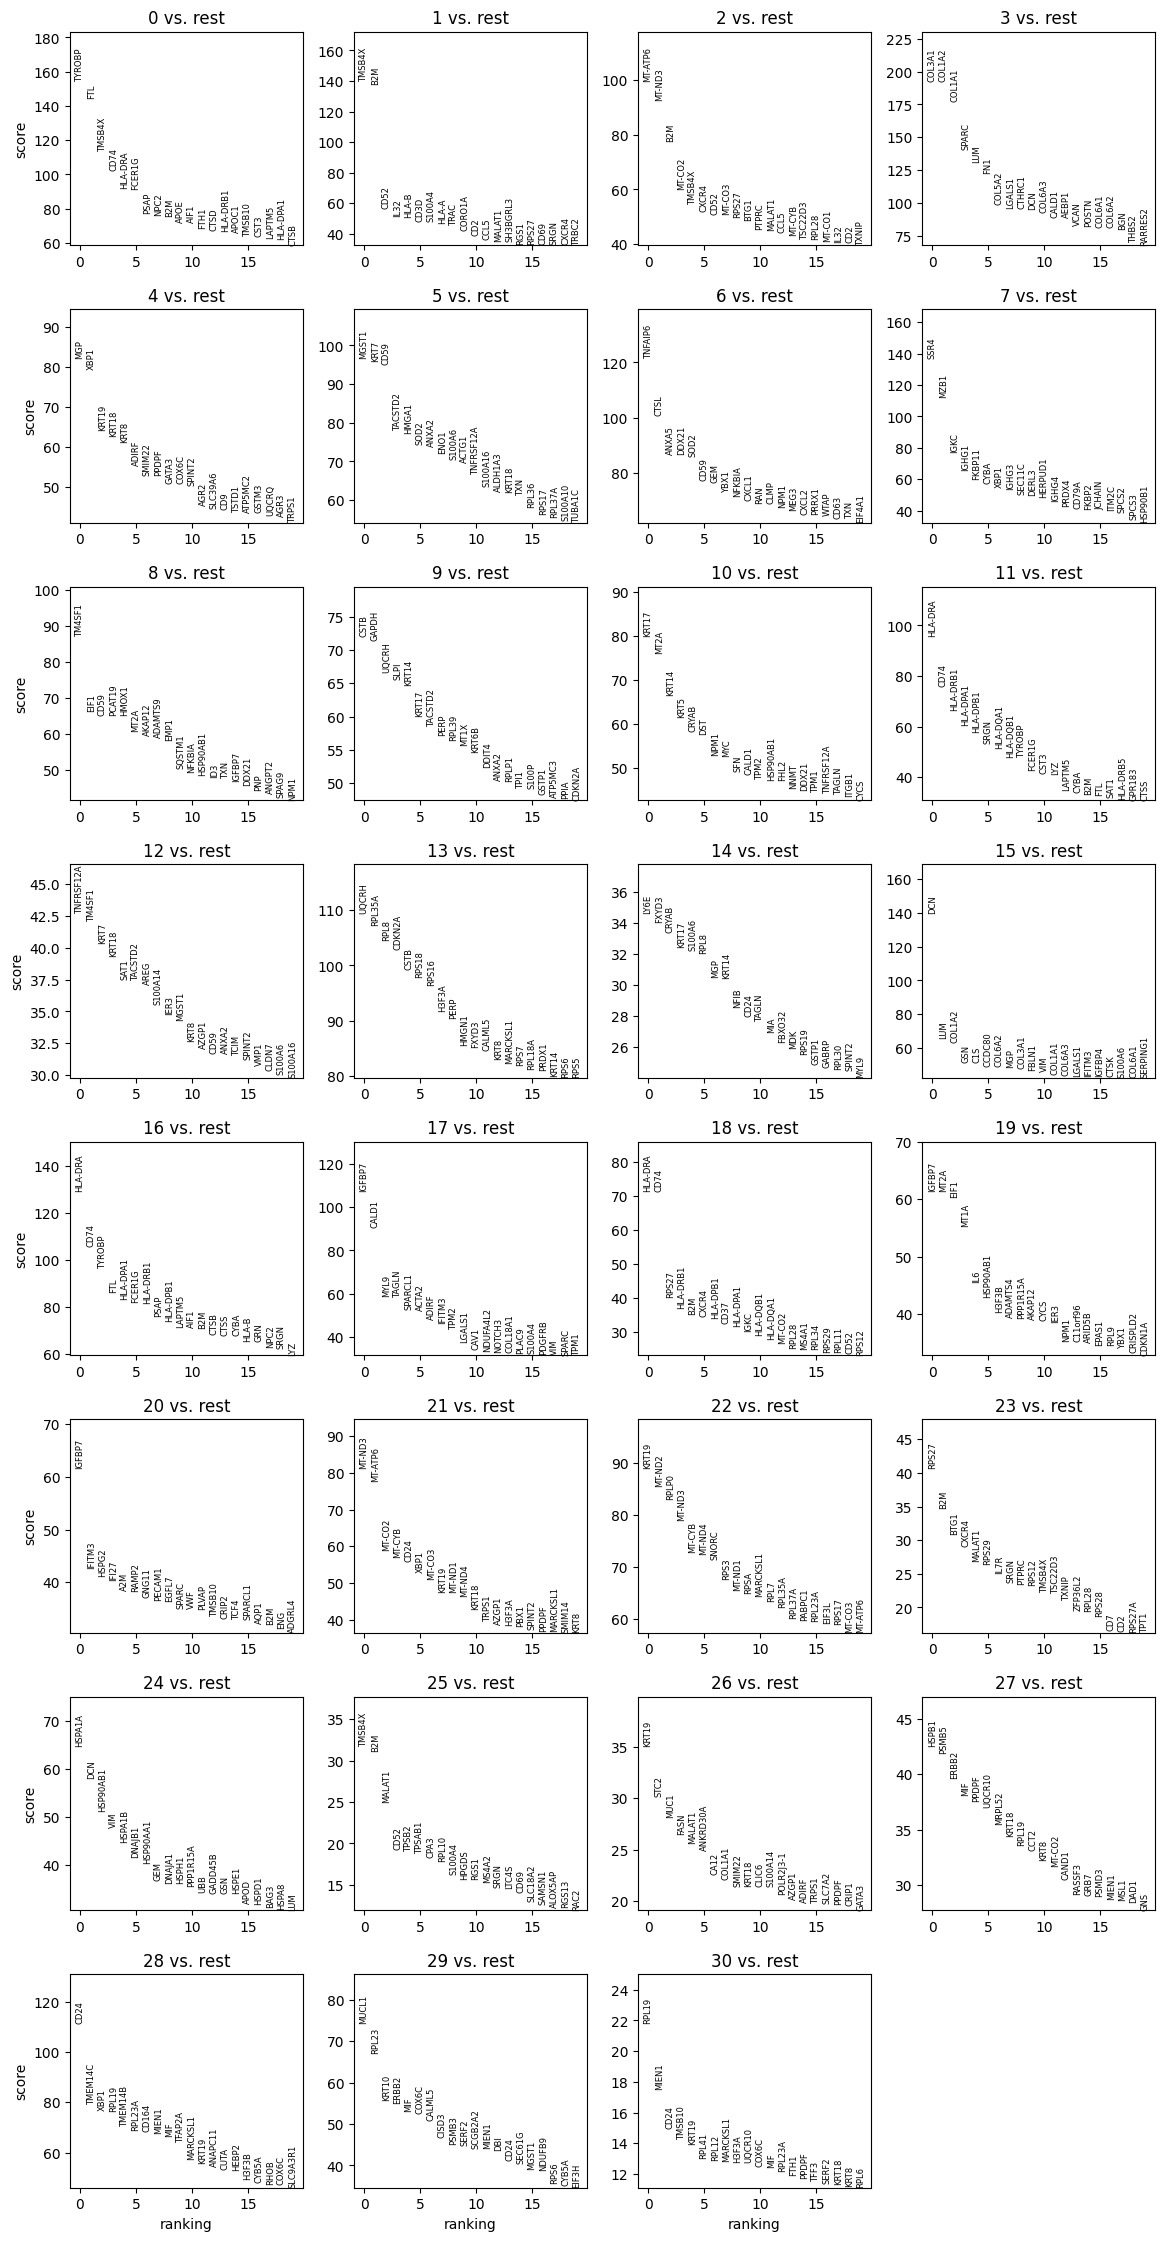

In [75]:
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False,
                        key = test_sel, fontsize = 6)